<h2>Question #7</h2>

In [1]:
set.seed(1)
library(ISLR)


Attaching package: 'ISLR'

The following object is masked _by_ '.GlobalEnv':

    Auto



In [2]:
normUSArr = data.frame(scale(USArrests))

In [3]:
head(normUSArr)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


In [4]:
distArrests <- dist(normUSArr)
transposeNormUSArr <- t(normUSArr)
corrArrests <- cor(transposeNormUSArr, use="pairwise.complete.obs")

In [5]:
a <- as.dist(1-corrArrests)
b <- (distArrests^2)

In [6]:
summary(a/b)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000086 0.069135 0.133943 0.234193 0.262589 4.887686 

<h2>Question 8</h2>

<h3>a</h3>

In [7]:
pr.out <- prcomp(normUSArr)

In [8]:
names(pr.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [9]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [10]:
pr.out$sdev

[1] 1.5748783 0.9948694 0.5971291 0.4164494

In [11]:
pve = (pr.out$sdev^2)/sum(pr.out$sdev^2)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

<h3>b</h3>

In [12]:
loadings <- as.data.frame(pr.out$rotation)

tot = array(1:ncol(loadings)*nrow(normUSArr), dim=c(nrow(normUSArr), ncol(loadings)))
for (j in 1:ncol(loadings)){
    for (i in 1:nrow(normUSArr)){
        stateUSArr = normUSArr[i,]
         tot[i,j] <- (stateUSArr[1,1] * loadings[1, j] + stateUSArr[1,2] * loadings[2, j] + stateUSArr[1,3] * loadings[3, j] + stateUSArr[1, 4] * loadings[4, j]) ^ 2
    }    
}

pve2 <- apply(tot, 2, sum) / nrow(normUSArr)
pve2/sum(pve2)

[1] 0.62006039 0.24744129 0.08914080 0.04335752

<h2>Question 9 </h2>

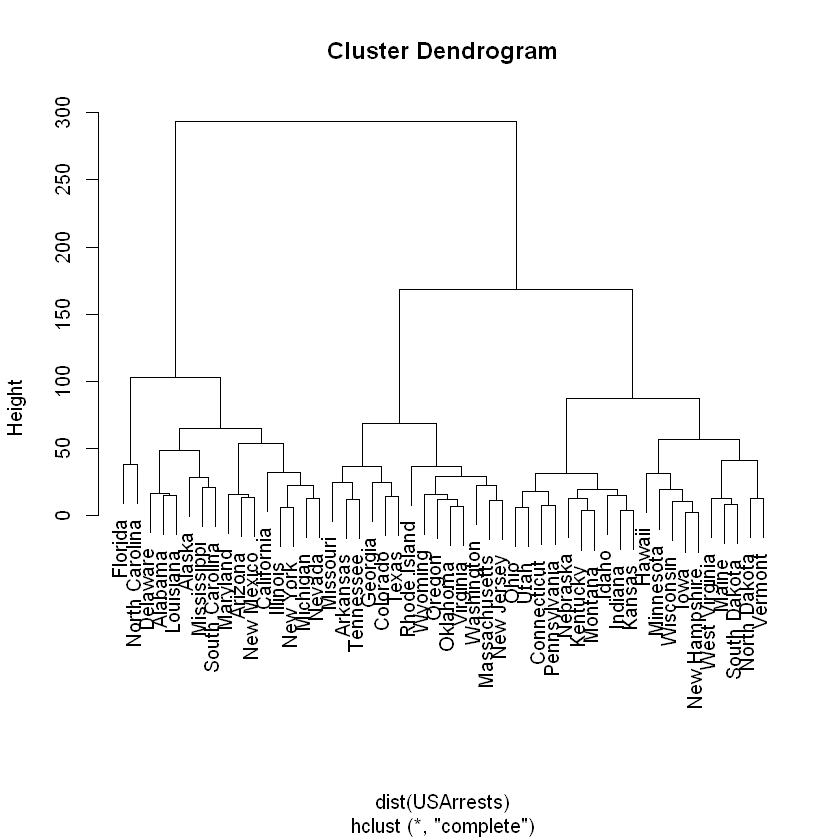

In [19]:
hc.clust <- hclust(dist(USArrests), method="complete")
plot(hc.clust)

In [18]:
cutree(hc.clust, k=3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

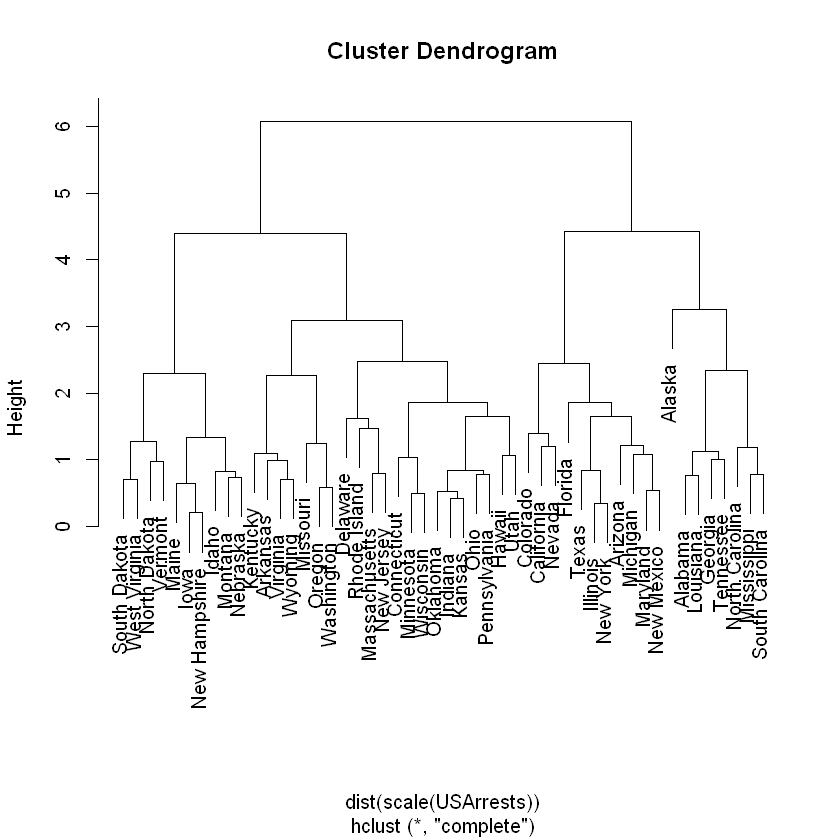

In [20]:
hc.clustSc <- hclust(dist(scale(USArrests)), method="complete")
plot(hc.clustSc)

In [21]:
cutree(hc.clustSc, k=3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

<h2>Question 10</h2>

In [69]:
x = matrix(rnorm(20*3*50, mean=0, sd=0.01), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1
head(x)
labs <- c(rep(1,20), rep(2,20), rep(3,20))
labs

0.017211171,1,-0.010013342,0.008294249,-0.002974489,0.0191471628,-1.585955e-03,-0.003970753,-0.0084253205,-0.007338027,...,0.010609978,-0.0066823943,0.003112743,-0.0001340717,-0.016720222,-0.0215535285,0.008502925,-0.0055224433,-0.009190703,0.0061073653
0.015581384,1,-0.006707390,0.009765332,-0.010435533,0.0065460395,7.828713e-03,-0.017080396,0.0097696072,-0.001704965,...,0.004087904,0.0077950174,0.001437727,-0.0196905499,-0.010147163,0.0118437067,-0.005451396,0.0036740582,-0.012003338,-0.0047381823
-0.016819918,1,0.022003056,0.017270806,0.014563411,-0.0101232723,-2.172331e-02,0.011571319,-0.0065604772,0.011362992,...,-0.002384662,-0.0069700094,-0.004185575,-0.0018582766,-0.005853419,0.0003047902,0.009062631,-0.0007394616,0.002736274,0.0061715648
0.008165156,1,0.001569377,0.009596257,-0.002452492,0.0022996721,-6.978249e-03,-0.009576686,-0.0008425011,-0.004200127,...,-0.022010926,-0.0009722732,0.009760489,0.0131997733,0.007841650,-0.0161110074,-0.007387574,0.0018531672,-0.004763710,-0.0007519937
-0.002531071,1,-0.007553628,0.004105029,-0.012258157,-0.0016873067,4.507820e-03,0.019444875,0.0120421331,-0.027441066,...,0.015436633,-0.0184734863,-0.009514464,-0.0175341320,0.005823071,-0.0072384060,-0.011977950,0.0069403317,-0.019442589,0.0201260091
-0.002656250,1,-0.003842110,0.008738457,0.011374285,-0.0005781195,9.922958e-05,-0.014897190,-0.0116857350,0.007279879,...,-0.008791575,-0.0099553412,0.010508274,-0.0083959616,-0.006674242,-0.0086428246,0.007981472,0.0156961808,-0.010818243,0.0053415650


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [70]:
pr.out <- prcomp(x)

In [71]:
pr.out$x[,1:2]

PC1,PC2
-0.6952273,-6.949470e-01
-0.6962297,-6.961741e-01
-0.7191409,-7.188968e-01
-0.7015764,-7.016267e-01
-0.7090533,-7.089013e-01
-0.7090723,-7.088801e-01
-0.7122536,-7.119913e-01
-0.6939817,-6.938497e-01
-0.7069762,-7.067535e-01
-0.7078277,-7.075846e-01


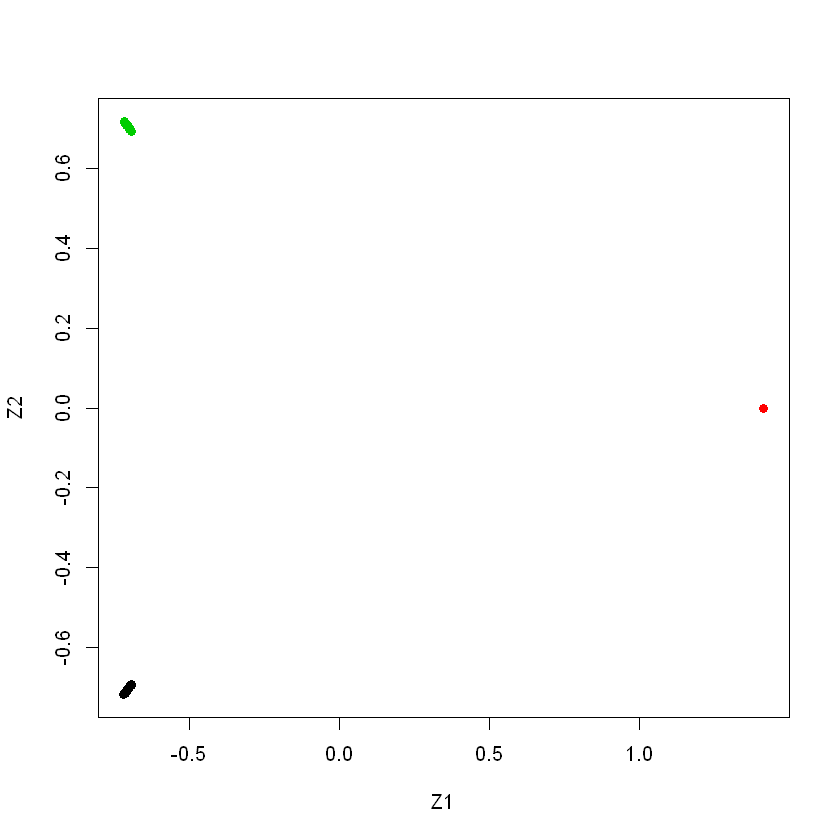

In [72]:
plot(pr.out$x[,1:2], col=labs, xlab="Z1", ylab="Z2", pch=19) 

In [77]:
km.out <- kmeans(x, 3, nstart=20)
table(km.out$cluster, labs)

   labs
     1  2  3
  1  0  0 20
  2  0 20  0
  3 20  0  0

In [78]:
kmeans(pr.out$x[,1:2], 2, nstart=20)

K-means clustering with 2 clusters of sizes 20, 40

Cluster means:
         PC1           PC2
1  1.4142824 -1.727827e-04
2 -0.7071412  8.639136e-05

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1] 5.70039e-07 2.00104e+01
 (between_SS / total_SS =  75.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [79]:
kmeans(pr.out$x[,1:2], 4, nstart=20)

K-means clustering with 4 clusters of sizes 20, 10, 10, 20

Cluster means:
         PC1           PC2
1  1.4142824 -0.0001727827
2 -0.7129325  0.7134086638
3 -0.7008313  0.7012114436
4 -0.7074005 -0.7071372710

Clustering vector:
 [1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 3 3 3 2 3 2 2 2 2 2 3 2 3 3 3 2 2 3 2 3

Within cluster sum of squares by cluster:
[1] 5.700390e-07 1.894267e-04 2.284684e-04 1.886169e-03
 (between_SS / total_SS = 100.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [80]:
km.out <- kmeans(pr.out$x[,1:2], 3, nstart=20)
table(km.out$cluster, labs)

   labs
     1  2  3
  1  0  0 20
  2 20  0  0
  3  0 20  0